### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

##### Building LSTM Model

In [7]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
6/6 [==============================] - 4s 654ms/sample - loss: 31058.6719
Epoch 2/300
6/6 [==============================] - 0s 0s/sample - loss: 30369.5625
Epoch 3/300
6/6 [==============================] - 0s 1ms/sample - loss: 29590.2793
Epoch 4/300
6/6 [==============================] - 0s 0s/sample - loss: 28769.1621
Epoch 5/300
6/6 [==============================] - 0s 0s/sample - loss: 27936.2559
Epoch 6/300
6/6 [==============================] - 0s 0s/sample - loss: 27105.8281
Epoch 7/300
6/6 [==============================] - 0s 3ms/sample - loss: 26289.7910
Epoch 8/300
6/6 [==============================] - 0s 3ms/sample - loss: 25501.0566
Epoch 9/300
6/6 [==============================] - 0s 5ms/sample - loss: 24733.2656
Epoch 10/300
6/6 [================

6/6 [==============================] - 0s 837us/sample - loss: 17.0419
Epoch 92/300
6/6 [==============================] - 0s 2ms/sample - loss: 15.9657
Epoch 93/300
6/6 [==============================] - 0s 2ms/sample - loss: 15.1583
Epoch 94/300
6/6 [==============================] - 0s 0s/sample - loss: 14.6401
Epoch 95/300
6/6 [==============================] - 0s 834us/sample - loss: 14.3963
Epoch 96/300
6/6 [==============================] - 0s 253us/sample - loss: 14.3842
Epoch 97/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.5435
Epoch 98/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8059
Epoch 99/300
6/6 [==============================] - 0s 2ms/sample - loss: 15.1049
Epoch 100/300
6/6 [==============================] - 0s 837us/sample - loss: 15.3827
Epoch 101/300
6/6 [==============================] - 0s 2ms/sample - loss: 15.5960
Epoch 102/300
6/6 [==============================] - 0s 2ms/sample - loss: 15.7181
Epoch 103/300
6/6 [

Epoch 190/300
6/6 [==============================] - 0s 3ms/sample - loss: 13.4351
Epoch 191/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.4185
Epoch 192/300
6/6 [==============================] - 0s 845us/sample - loss: 13.4020
Epoch 193/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.3844
Epoch 194/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.3671
Epoch 195/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.3494
Epoch 196/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.3306
Epoch 197/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.3106
Epoch 198/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.2919
Epoch 199/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.2731
Epoch 200/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.2525
Epoch 201/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.2300
Ep

Epoch 289/300
6/6 [==============================] - 0s 2ms/sample - loss: 8.5406
Epoch 290/300
6/6 [==============================] - 0s 2ms/sample - loss: 8.4202
Epoch 291/300
6/6 [==============================] - 0s 1ms/sample - loss: 8.3661
Epoch 292/300
6/6 [==============================] - 0s 2ms/sample - loss: 8.2778
Epoch 293/300
6/6 [==============================] - 0s 1ms/sample - loss: 8.1673
Epoch 294/300
6/6 [==============================] - 0s 2ms/sample - loss: 8.0731
Epoch 295/300
6/6 [==============================] - 0s 1ms/sample - loss: 8.0016
Epoch 296/300
6/6 [==============================] - 0s 1000us/sample - loss: 7.8862
Epoch 297/300
6/6 [==============================] - 0s 2ms/sample - loss: 7.8789
Epoch 298/300
6/6 [==============================] - 0s 1ms/sample - loss: 7.7776
Epoch 299/300
6/6 [==============================] - 0s 833us/sample - loss: 7.6367
Epoch 300/300
6/6 [==============================] - 0s 1ms/sample - loss: 7.5108


#### Predicting For the next 10 data

In [12]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = np.array(x_input).reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[229.19147]
1 day input [196.         210.         229.19146729]
1 day output [[243.22536]]
2 day input [210.         229.19146729 243.22535706]
2 day output [[261.74078]]
3 day input [229.19147 243.22536 261.74078]
3 day output [[282.46176]]
4 day input [243.22536 261.74078 282.46176]
4 day output [[301.7379]]
5 day input [261.74078 282.46176 301.7379 ]
5 day output [[324.5493]]
6 day input [282.46176 301.7379  324.5493 ]
6 day output [[348.83835]]
7 day input [301.7379  324.5493  348.83835]
7 day output [[373.69104]]
8 day input [324.5493  348.83835 373.69104]
8 day output [[401.4947]]
9 day input [348.83835 373.69104 401.4947 ]
9 day output [[430.9339]]
[229.19147, 243.22536, 261.74078, 282.46176, 301.7379, 324.5493, 348.83835, 373.69104, 401.4947, 430.9339]


In [13]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [14]:
lst_output

[229.19147,
 243.22536,
 261.74078,
 282.46176,
 301.7379,
 324.5493,
 348.83835,
 373.69104,
 401.4947,
 430.9339]

### Visualizaing The Output

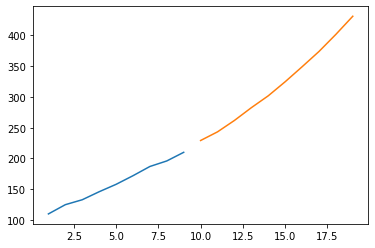

In [16]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)